In [ ]:
## Data Analysis Phase
## MAin aim is to understand more about the data
 
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
 
pd.pandas.set_option('display.max_columns',None)

In [ ]:
# Upload the file 

house = pd.read_csv('/content/MagicBricks.csv')

In [ ]:
## print the top5 records

house.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
## print shape of dataset with rows and columns

house.shape

(1259, 11)

In [ ]:
## print the Information of the dataset

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
# Finding the null values.

house.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [ ]:
## describe() is used to view some basic statistical details like min,max, mean, std etc. of a data frame or a series of numeric values. 

house.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


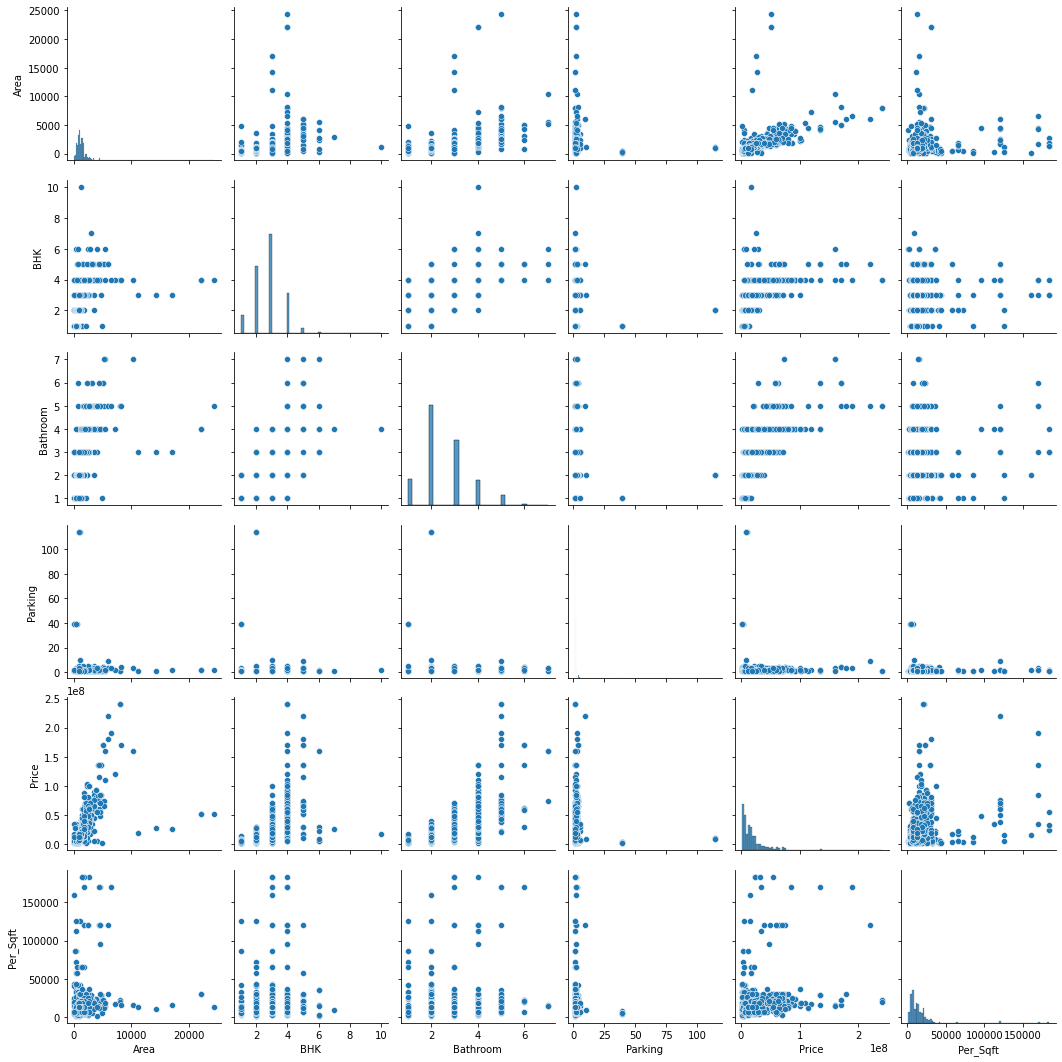

In [ ]:
sns.pairplot(house)    # Exploring the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


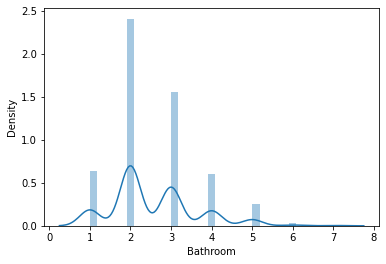

In [ ]:
sns.distplot(house['Bathroom'])

In [ ]:
# Print the Correlations.
house.corr()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.449438,0.535104,-0.009297,0.580836,0.162832
BHK,0.449438,1.000000,0.773267,-0.070707,0.571523,0.181540
Bathroom,0.535104,0.773267,1.000000,-0.032796,0.728108,0.219169
Parking,-0.009297,-0.070707,-0.032796,1.000000,-0.000448,0.001607
Price,0.580836,0.571523,0.728108,-0.000448,1.000000,0.322859
Per_Sqft,0.162832,0.181540,0.219169,0.001607,0.322859,1.000000


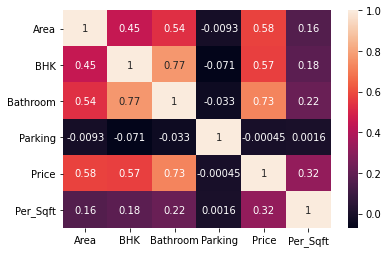

In [ ]:
sns.heatmap(house.corr(),annot=True)                      ## it will show the correlation of the data frame

In [ ]:
# Finding out the correlation between the features
corr = house.corr()
corr.shape

(6, 6)

In [ ]:
# applying groupby() function to 
# group the data on Locality and Status.   

by_data=house.groupby(['Locality','Status']).size().unstack().fillna(0)      # First grouping based on "Locality" 
                                                                                # Within each Locality we are grouping based on "Status"
type(by_data)

pandas.core.frame.DataFrame

In [ ]:
by_data.head(10)

Status,Almost_ready,Ready_to_move
Locality,,
"APL Builder Floor, Greater Kailash 1",0.0,2.0
"Aashirwaad Chowk, Dwarka",0.0,6.0
"Abhimanyu Apartments, Vasundhara Enclave",0.0,2.0
"Abul Fazal Enclave Part 1, Okhla",0.0,3.0
"Abul Fazal Enclave Part-II, Okhla",0.0,3.0
"Adarsh Homes, Dwarka Mor",0.0,3.0
"Ahinsha Vatika, Ram Nagar, Shahdara",0.0,1.0
Alaknanda,0.0,20.0
"Amar Colony, Lajpat Nagar",0.0,2.0


In [ ]:
house.Locality.unique()     ##unique() function finds the unique elements of an array and returns these unique elements as a sorted array.

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


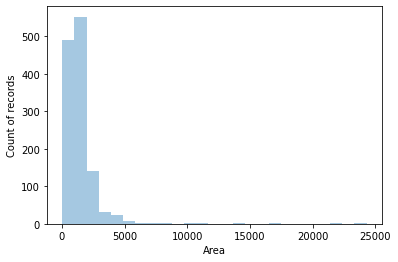

In [ ]:
# area count

plt.ylabel('Count of records')
sns.distplot(house['Area'], bins=25, kde=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


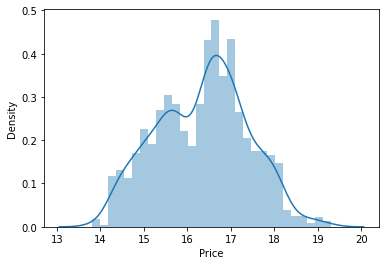

In [ ]:
# plotting price column as log

sns.distplot(np.log(house['Price']), bins=30)
plt.show()

# Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

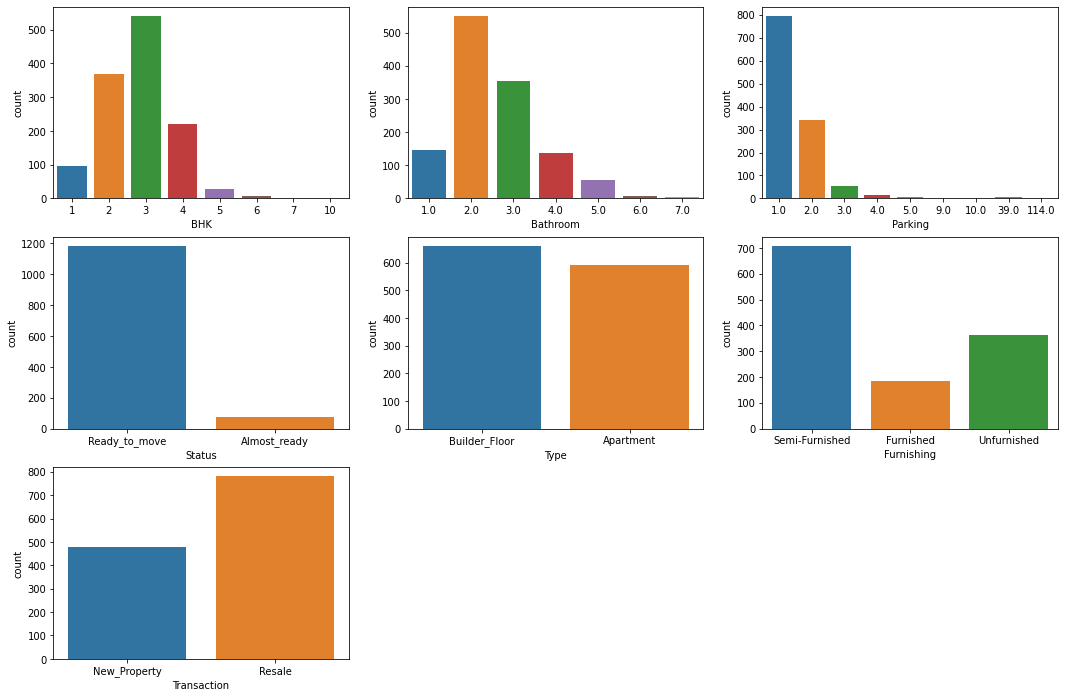

In [ ]:
# plotting frequency graphs for categorical variables

plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.countplot(house['BHK'])
plt.subplot(3,3,2)
sns.countplot(house['Bathroom'])
plt.subplot(3,3,3)
sns.countplot(house['Parking'])
plt.subplot(3,3,4)
sns.countplot(house['Status'])
plt.subplot(3,3,5)
sns.countplot(house['Type'])
plt.subplot(3,3,6)
sns.countplot(house['Furnishing'])
plt.subplot(3,3,7)
sns.countplot(house['Transaction'])
plt.show()

# Bi-variate Analysis

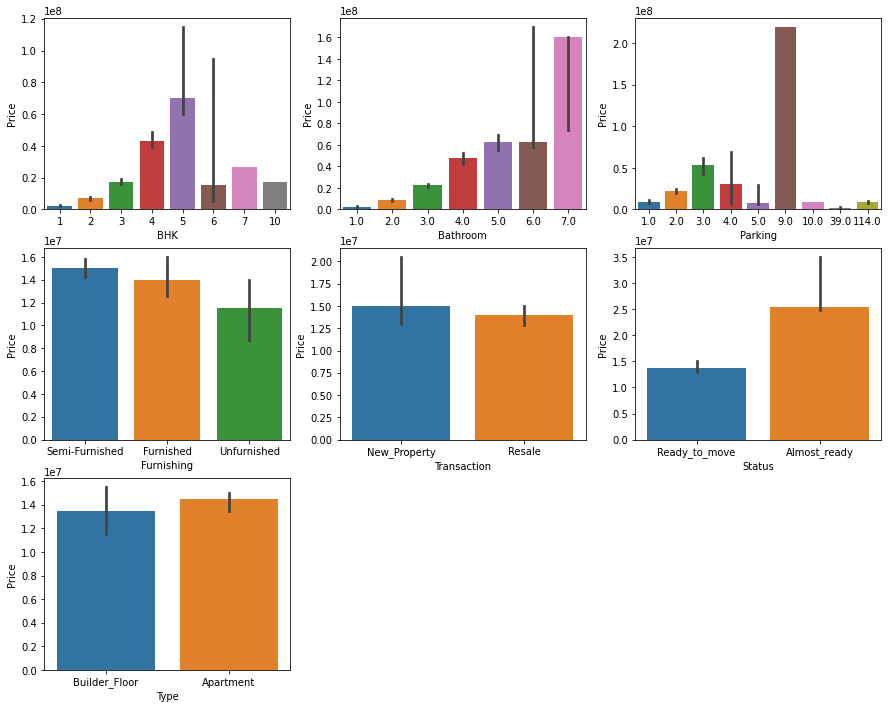

In [ ]:
# plotting barplot for all variables against target variable

plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.barplot(x='BHK', y='Price', data=house, estimator=np.median)
plt.subplot(3,3,2)
sns.barplot(x='Bathroom', y='Price', data=house, estimator=np.median)
plt.subplot(3,3,3)
sns.barplot(x='Parking', y='Price', data=house, estimator=np.median)
plt.subplot(3,3,4)
sns.barplot(x='Furnishing',y='Price', data=house, estimator=np.median)
plt.subplot(3,3,5)
sns.barplot(x='Transaction',y='Price', data=house, estimator=np.median)
plt.subplot(3,3,6)
sns.barplot(x='Status',y='Price', data=house, estimator=np.median)
plt.subplot(3,3,7)
sns.barplot(x='Type',y='Price', data=house, estimator=np.median)
plt.show()

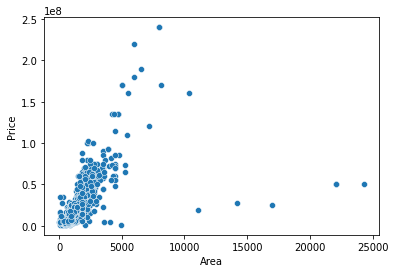

In [ ]:
# plotting area against target variable

sns.scatterplot(x='Area',y='Price',data=house)
plt.show()

# Feature Engineering

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

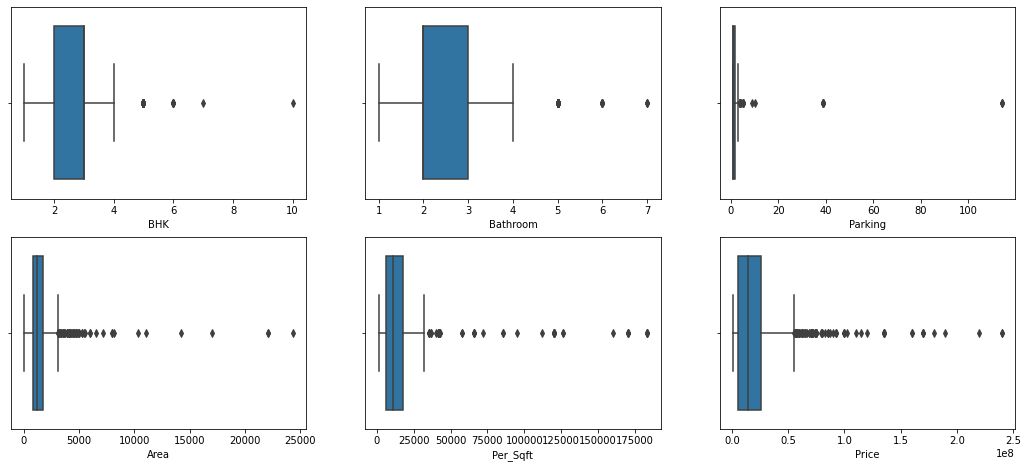

In [ ]:
# plotting boxplot for each variables

plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.boxplot(house['BHK'])
plt.subplot(3,3,2)
sns.boxplot(house['Bathroom'])
plt.subplot(3,3,3)
sns.boxplot(house['Parking'])
plt.subplot(3,3,4)
sns.boxplot(house['Area'])
plt.subplot(3,3,5)
sns.boxplot(house['Per_Sqft'])
plt.subplot(3,3,6)
sns.boxplot(house['Price'])
plt.show()

In [ ]:
# reduced dataset by removing insignificant observations to get rid of outliers

df = house[(house['BHK']<7)&(house['Bathroom']<6)&(house['Parking']<9)&(house['Area']<10000)]
print('Previous dataset shape:', house.shape)
print('New dataset shape:',df.shape)

Previous dataset shape: (1259, 11)
New dataset shape: (1197, 11)


# Handling missing values

In [ ]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       1
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             1
Per_Sqft       217
dtype: int64

In [ ]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df[~(df['Furnishing'].isnull())]

In [ ]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

# Data Pre-processing

In [ ]:
# dropping locality variable

df = df.drop('Locality', axis=1)

# checking shape of final dataset

df.shape

(1196, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1257
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1196 non-null   float64
 1   BHK          1196 non-null   int64  
 2   Bathroom     1196 non-null   float64
 3   Furnishing   1196 non-null   object 
 4   Parking      1196 non-null   float64
 5   Price        1196 non-null   int64  
 6   Status       1196 non-null   object 
 7   Transaction  1196 non-null   object 
 8   Type         1196 non-null   object 
 9   Per_Sqft     1196 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 102.8+ KB


In [ ]:
cat_cols = ['BHK','Bathroom','Furnishing','Parking','Status','Transaction','Type']
num_cols = ['Area','Price','Per_Sqft']

In [ ]:
 #convert data types of categorical variable as string
 
for cols in cat_cols:
    df[cols] = df[cols].astype(str)

In [ ]:
# creating dummy variables

df = pd.get_dummies(data=df, drop_first=True)
df.head()

,Area,Price,Per_Sqft,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Parking_2.0,Parking_3.0,Parking_4.0,Parking_5.0,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
0,800.0,6500000,8125.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
1,750.0,5000000,6667.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,950.0,15500000,6667.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,600.0,4200000,6667.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1
4,650.0,6200000,6667.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1


# Model Building

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


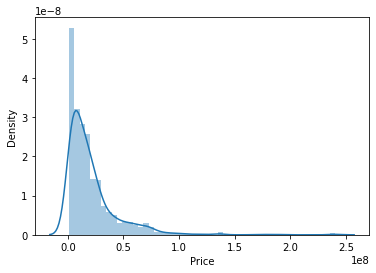

In [ ]:
sns.distplot(df['Price'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


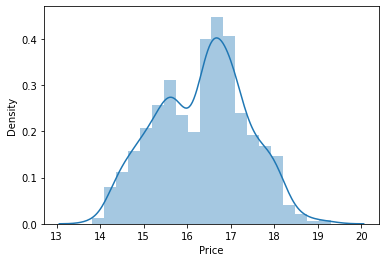

In [ ]:
# converting target variable into log

df['Price'] = np.log(df['Price'])

# plotting target variable dist plot post log transformation

sns.distplot(df['Price'])
plt.show()

In [ ]:
# separating dataset into X and y

X = df.drop('Price', axis=1)
y = df['Price']

# Dataset Preparation (Splitting and Scaling)

Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set.

Features (X): The columns that are inserted into our model will
be used to make predictions.

Prediction (y): Target variable that will be predicted by the features

In [ ]:
# dividing data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# scaling data

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (801, 20)
Shape of X_test: (395, 20)


# LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#furnishing_encoder=LabelEncoder()

status_encoder=LabelEncoder()
transaction_encoder=LabelEncoder()
type_encoder=LabelEncoder()

In [ ]:
house['Status']=status_encoder.fit_transform(house['Status'])
house['Transaction']=transaction_encoder.fit_transform(house['Transaction'])


In [ ]:
house.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,1,0,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,0,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,1,1,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,1,1,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,1,0,Builder_Floor,6667.0


# OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')

In [ ]:
X_transform=ohe.fit_transform(house[['BHK','Area']]).toarray()

In [ ]:
## drop the last column 'price','per square feet', since it is irrelevant

house.drop(columns=['Price','Per_Sqft'], axis=1, inplace=True)   

# LinearRegression

In [ ]:
# importing linear regression package

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fitting train data

lr.fit(X_train, y_train)

#predicting train data

pred_train_lr = lr.predict(X_train)

# predicting test data

pred_test_lr = lr.predict(X_test)

# importing evaluation metrices

from sklearn.metrics import r2_score, mean_squared_error
print('Train data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_train_lr, y_train)))
print('R-squared:',r2_score(pred_train_lr,y_train))
print('\n')
print('Test data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_test_lr, y_test)))
print('R-squared:',r2_score(pred_test_lr,y_test))

Train data results
RMSE: 0.4937827941440134
R-squared: 0.6913718589193123


Test data results
RMSE: 0.5486398648809516
R-squared: 0.6794431209155051


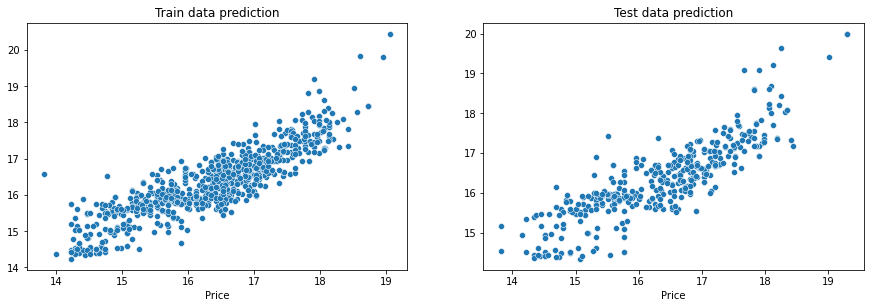

In [ ]:
# plotting result for visual

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Train data prediction')
sns.scatterplot(x=y_train,y=pred_train_lr)
plt.subplot(2,2,2)
plt.title('Test data prediction')
sns.scatterplot(x=y_test,y=pred_test_lr)
plt.show()

# Random Forest Regressor

In [ ]:
# importing random forest regressor package

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# fitting training data

rf.fit(X_train,y_train)

# predicting train data

pred_train_rf = rf.predict(X_train)

#predicting test data

pred_test_rf = rf.predict(X_test)

# evaluating the model

print('Train data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_train_rf, y_train)))
print('R-squared:',r2_score(pred_train_rf,y_train))
print('\n')
print('Test data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_test_rf, y_test)))
print('R-squared:',r2_score(pred_test_rf,y_test))

Train data results
RMSE: 0.1470036553701673
R-squared: 0.9773245486543073


Test data results
RMSE: 0.388397580723078
R-squared: 0.8516074817793883


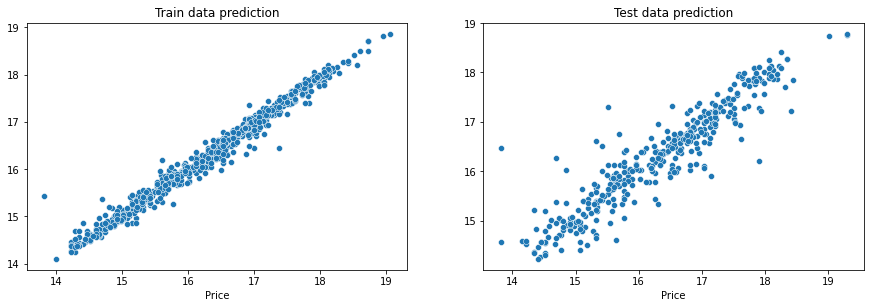

In [ ]:
# plotting results for visual
 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Train data prediction')
sns.scatterplot(x=y_train,y=pred_train_rf)
plt.subplot(2,2,2)
plt.title('Test data prediction')
sns.scatterplot(x=y_test,y=pred_test_rf)
plt.show()

# GradientBoostingRegressor

In [ ]:
# import gradient boosting regressor package

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# fitting training data

gbr.fit(X_train, y_train)

# predicting train data

pred_train_gbr = gbr.predict(X_train)

# predicting test data 

pred_test_gbr = gbr.predict(X_test)

# evaluating the model

print('Train data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_train_gbr, y_train)))
print('R-squared:',r2_score(pred_train_gbr,y_train))
print('\n')
print('Test data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_test_gbr, y_test)))
print('R-squared:',r2_score(pred_test_gbr,y_test))

Train data results
RMSE: 0.26776022461311744
R-squared: 0.922425847415909


Test data results
RMSE: 0.3877883811670648
R-squared: 0.8495732534484938


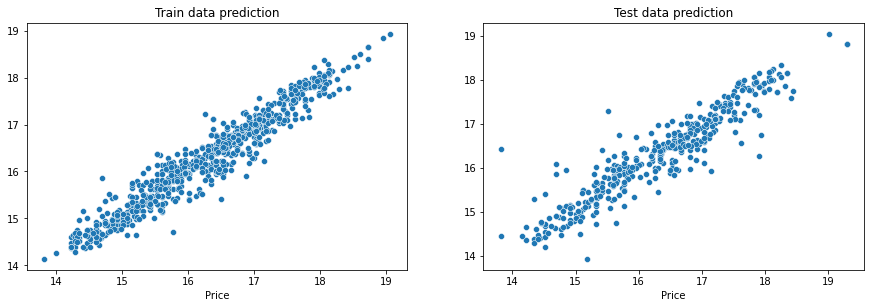

In [ ]:

# plotting results for visual

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Train data prediction')
sns.scatterplot(x=y_train,y=pred_train_gbr)
plt.subplot(2,2,2)
plt.title('Test data prediction')
sns.scatterplot(x=y_test,y=pred_test_gbr)
plt.show()

# Xtreme Gradient Boosting Regressor

In [ ]:
# importing xtreme boosting regressor package

from xgboost import XGBRegressor
xgb = XGBRegressor()

# fitting training data

xgb.fit(X_train,y_train)

# predicting train data

pred_train_xgb = xgb.predict(X_train)

# predicting test data

pred_test_xgb = xgb.predict(X_test)

# evaluating the model

print('Train data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_train_xgb, y_train)))
print('R-squared:',r2_score(pred_train_xgb,y_train))
print('\n')
print('Test data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_test_xgb, y_test)))
print('R-squared:',r2_score(pred_test_xgb,y_test))

[07:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train data results
RMSE: 0.28744633036274475
R-squared: 0.9090740522031442


Test data results
RMSE: 0.39607211415880245
R-squared: 0.8431624157028421


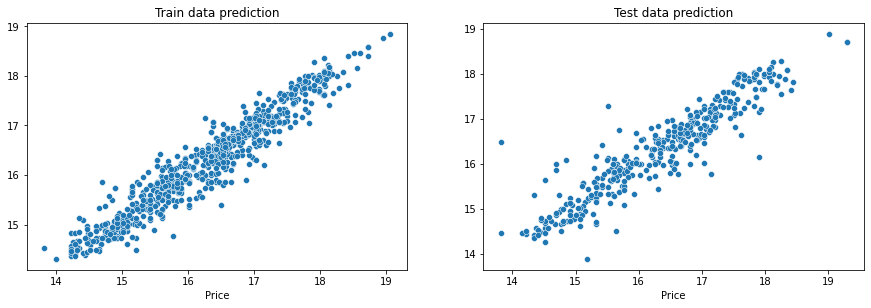

In [ ]:
# plotting results for visual

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Train data prediction')
sns.scatterplot(x=y_train,y=pred_train_xgb)
plt.subplot(2,2,2)
plt.title('Test data prediction')
sns.scatterplot(x=y_test,y=pred_test_xgb)
plt.show()

# Result

In [ ]:
data = [['Linear_Regression',r2_score(pred_train_lr,y_train),r2_score(pred_test_lr,y_test)],
        ['Random_Forest',r2_score(pred_train_rf,y_train),r2_score(pred_test_rf,y_test)],
        ['Gradient_Boosting_Regressor',r2_score(pred_train_gbr,y_train),r2_score(pred_test_gbr,y_test)],
        ['XGBoosting_Regressor',r2_score(pred_train_xgb,y_train),r2_score(pred_test_xgb,y_test)]]
result = pd.DataFrame(data, columns=['algo','train_score','test_score'])
result

,algo,train_score,test_score
0,Linear_Regression,0.691372,0.679443
1,Random_Forest,0.977325,0.851607
2,Gradient_Boosting_Regressor,0.922426,0.849573
3,XGBoosting_Regressor,0.909074,0.843162
